# Checkpoint 2 - Simple Monte Carlo Generation of Pseudo-Experiments
### Claire Berschauer, 12 October 2022

In [73]:
#imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## 1. Simulating 1000 Muon Decays

Muons decay according to an exponential decay time distribution with characteristic lifetime $\tau$.  

P($t_i$ | $\tau$) = (1/$\tau$)*exp(-$t_i$/$\tau$)  

Write code to produce a set of 1000 random muon decay times drawn from such a distribution (where $\tau$ = 2.2 microseconds) in the range 0 < t < 10 microseconds. Plot the values in a histogram and check that it has an exponential shape.

In [97]:
# Producing a set of 1000 random muon decay times using the inverse cumulative method
decay_times = np.empty(1000)

for i in range(1000):
    rng = np.random.default_rng()
    y1 = rng.random((1,))
    
    # P = (1/2.2)*np.exp(-t/2.2)
    # g(x) = 1 - np.exp(-x/2.2)
    # g-1(x) = -2.2*np.log(1-x)
    
    y1_conv = (1 - np.exp(-10/2.2))*y1
    x = -2.2*np.log(1 - y1_conv)
    decay_times[i] = x

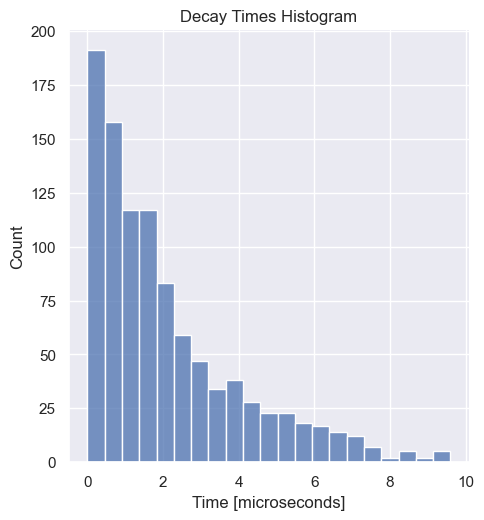

In [98]:
# Plotting the decay times in a histogram
sns.set()
sns.displot(decay_times)
plt.xlabel("Time [microseconds]")
plt.title("Decay Times Histogram")
plt.show()

## 2. Estimating the Muon Lifetime

Estimate the lifetime from the dataset generated in section 1. Do this by averaging all of the decay times in the decay_times array.  
Compare this result with the lifetime ($\tau$ = 2.2 $\mu$s) that was used to generate the random decay times. Why are they not the same? 

In [99]:
avg_tau = decay_times.mean()
print("Average Lifetime:", avg_tau)

Average Lifetime: 2.107776042696684


#### Result:

The calculated average lifetime is 2.108 microseconds, which is less than the original 2.2 microseconds. The result of a single simulation shouldn't be expected to result in an exact average equal to the actual lifetime. The randomness of the decay time selection introduces uncertainty. Averaging over more times would likely result in a closer estimate. The current estimate is likely less than the actual decay lifetime due to the nature of exponential decay. 

## 3. Repetition 500 Times

In [102]:
tau_vals = np.empty(500)

for i in range(500):
    decay_times = np.empty(1000)

    for j in range(1000):
        rng = np.random.default_rng()
        y1 = rng.random((1,))

        # P = (1/2.2)*np.exp(-t/2.2)
        # g(x) = 1 - np.exp(-x/2.2)
        # g-1(x) = -2.2*np.log(1-x)

        y1_conv = (1 - np.exp(-10/2.2))*y1
        x = -2.2*np.log(1 - y1_conv)
        decay_times[j] = x
    tau_vals[i] = decay_times.mean()

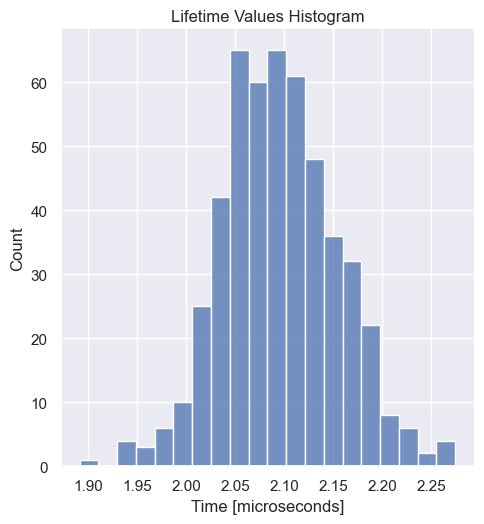

In [104]:
# Plotting the tau values in a histogram
sns.set()
sns.displot(tau_vals)
plt.xlabel("Time [microseconds]")
plt.title("Lifetime Values Histogram")
plt.show()

What do you learn from this distribution? 
- How well (with what numerical precision) can you expect to estimate the true lifetime from any single experiment?
- Is the method biased ? what is the bias and precision on the bias  

To answer this you need to understand the difference between the following quantities:
- The mean of a Gaussian distribution
- The standard deviation of the distribution (RMS deviation) and what it tells you
- The error on the knowledge of the mean (hint is is NOT the standard deviation)

### Gaussian Distribution:
Formula: $\phi$(x, $\mu$, $\sigma$) = $\frac{1}{\sigma \sqrt{2\pi}}$exp($-\frac{(x-\mu)^2}{2\sigma^2})$ where $\mu$ is the mean and $\sigma$ is the standard deviation.

__Mean__:  
The mean, or expected value, of the gaussian distribution is the arithmetic average value of a random variable having that probability: $\Sigma$xP(x). This value is a measure of central tendency of the distribution.  

__Standard Deviation__:
The standard deviation of a distribution is a measure of the amount of variation in the values. In a gaussian distribution, 68% of the values lie within 1 standard deviation of the mean, 95% within 2 standard deviations, and 99% within 3 standard deviations.  

__RMSD__:
The root mean squared deviation (RMSD) is a measure of accuracy for a specific dataset. For an unbiased estimator, the RMSD is equivalent to the standard deviation. RMSD can be calculated using the formula:   
$RMSD = \sqrt{\frac{\Sigma (\tau - \tau_{pred})^2}{N}}$

#### _Is the model biased?_

Calculating RMSD and standard deviation of the data:

In [108]:
stdv = tau_vals.std()
print("Standard Deviation =", stdv)

Standard Deviation = 0.05878945407504955


In [122]:
prec = 1/(stdv**2)
print("Precision =", prec)

Precision = 289.3351154192958


In [114]:
# RMSD
RMSD = sum((tau_vals - 2.2)**2)/len(tau_vals)
print("RMSD =", RMSD)

RMSD = 0.014311598367908013


How many standard deviations away from the mean is the actual lifetime?

In [116]:
mean = tau_vals.mean()
print("Mean =", mean)

Mean = 2.0958107565174524


In [121]:
bias = 2.2 - mean
print("Bias =", bias)
print("Bias in percentage of original value:", bias/2.2*100, "%")

Bias = 0.10418924348254777
Bias in percentage of original value: 4.735874703752171 %


In [117]:
sigmas = (2.2 - mean)/stdv
print("The actual lifetime is", sigmas, "standard deviations away from the mean.")

The actual lifetime is 1.7722437658553807 standard deviations away from the mean.


### Section 3 Checkpoint Questions:

1. How well (with what numerical precision) can you expect to measure the lifetime from any single experiment?  

In statistics, precision is defined as the inverse of the variance, or $\frac{1}{\sigma^2}$. In this case, the precision to which the lifetime can be measured from any single experiment is 289.3 1/$\mu$s. 

2. Is the method biased? What is the bias and precision on the bias?  

The method is biased, since the mean value of the generated lifetime distribution is not equal to the original lifetime value used to generate the data. The bias on this dataset, calculated by $\tau - \mu$, is 0.1042, which is 4.7% of the original value. From the distribution perspective, the original lifetime value lies 1.77 standard distributions away from the mean, placing it in the 93rd percentile of the data. This indicates there is a bias towards lower than expected lifetime values in this distribution.

## 4. Adding Background

In [123]:
# Exponential distribution of 'muon data'
decay_times = np.empty(1000)

for i in range(1000):
    rng = np.random.default_rng()
    y1 = rng.random((1,))
    
    # P = (1/2.2)*np.exp(-t/2.2)
    # g(x) = 1 - np.exp(-x/2.2)
    # g-1(x) = -2.2*np.log(1-x)
    
    y1_conv = (1 - np.exp(-10/2.2))*y1
    x = -2.2*np.log(1 - y1_conv)
    decay_times[i] = x

In [124]:
# Background type 1: narrow gaussian centered at zero
b_1 = np.random.normal(size=(1000,))

In [125]:
# Background type 2: non-muon exponential decay
b_2 = np.random.exponential(scale=5, size=(1000,))

In [131]:
data = 0.70*decay_times + 0.10*b_1 + 0.20*b_2

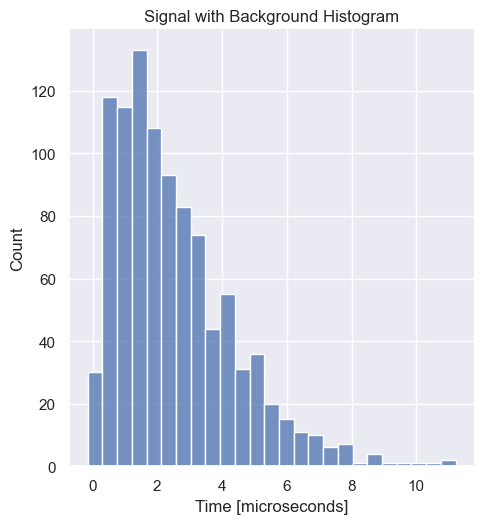

In [132]:
sns.set()
sns.displot(data)
plt.xlabel("Time [microseconds]")
plt.title("Signal with Background Histogram")
plt.show()

In [133]:
tau_vals_b = np.empty(500)

for i in range(500):
    decay_times = np.empty(1000)

    for j in range(1000):
        rng = np.random.default_rng()
        y1 = rng.random((1,))

        # P = (1/2.2)*np.exp(-t/2.2)
        # g(x) = 1 - np.exp(-x/2.2)
        # g-1(x) = -2.2*np.log(1-x)

        y1_conv = (1 - np.exp(-10/2.2))*y1
        x = -2.2*np.log(1 - y1_conv)
        decay_times[j] = x
    
    b_1 = np.random.normal(size=(1000,))
    b_2 = np.random.exponential(scale=5, size=(1000,))
    data = 0.70*decay_times + 0.10*b_1 + 0.20*b_2
    
    tau_vals_b[i] = data.mean()

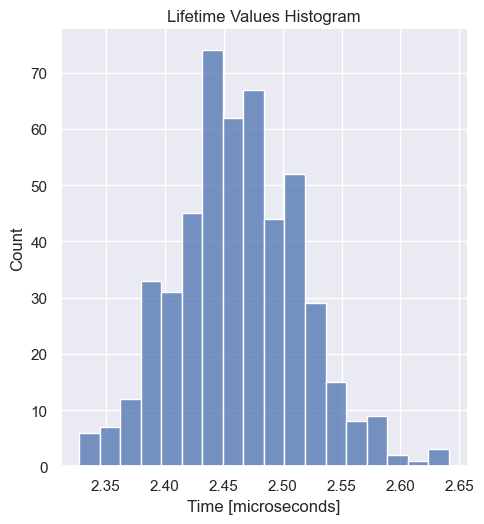

In [134]:
sns.set()
sns.displot(tau_vals_b)
plt.xlabel("Time [microseconds]")
plt.title("Lifetime Values Histogram")
plt.show()

For more background analysis: analyze behavior when only background 1 and signal or only background 2 and signal; compare how the biases (and histograms) change for each case. 

## 5. Adding Time Acceptance

In [146]:
# time efficiency/time acceptance
# a(t)  = 1 - exp(-t/G) where G is 0.1*2.2

dps = np.empty(1000)
counter = 0

while counter < 1000:
    rng = np.random.default_rng()
    x = rng.random((1,))
    
    # P = (1/2.2)*np.exp(-t/2.2)*(1 - exp(-t/G))
    
    x1 = 10*x
    y1 = (1/2.2)*np.exp(-x1/2.2)*(1 - np.exp(-10*x1/2.2))
    
    y2 = 0.1*rng.random((1,))
    
    if y2 < y1:
        dps[counter] = x1
        counter += 1
    else:
        pass

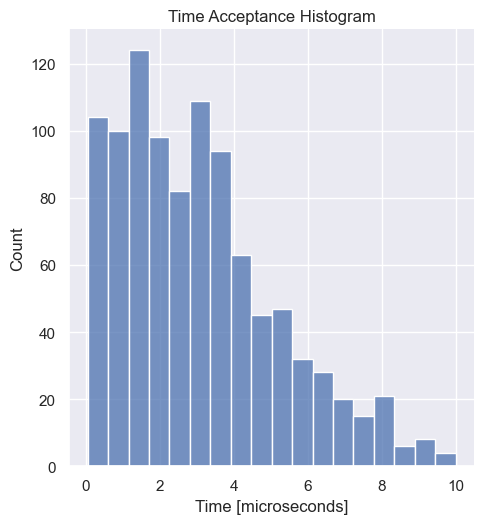

In [147]:
sns.set()
sns.displot(dps)
plt.xlabel("Time [microseconds]")
plt.title("Time Acceptance Histogram")
plt.show()